# Joel Semeniuk

## Research question/interests


I am interested in this dataset to better understand the impacts of different health related factors on insurance charges. I am also interested in how these various health factors effects one's BMI score.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/insurance.csv")
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Milestone 3
### Task 1 EDA

There are 1338 entries with 7 columns

In [3]:
data = pd.read_csv("../data/raw/insurance.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Below shows the first 5 entries, just to show what they look like.

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Here is a quick summary through the numeric columns.

In [5]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Here all rows that contained null were dropped. It looks like all of the rows were kept so there were no null values.

In [6]:
df_dropped = data.dropna(axis=0)
df_dropped

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Changing the smoker column from string to bool.

In [7]:
data["smoker"] = data["smoker"] == "yes"
data["smoker"]

0        True
1       False
2       False
3       False
4       False
        ...  
1333    False
1334    False
1335    False
1336    False
1337     True
Name: smoker, Length: 1338, dtype: bool

This histogram shows the distribution of charges. Looks like there are more less expensive charges than more expensive.

<AxesSubplot:xlabel='charges', ylabel='Count'>

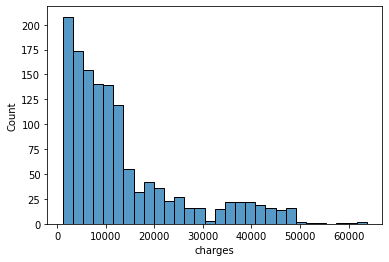

In [8]:
sns.histplot(data["charges"])

This scatter plot with charges vs bmi doesn't inherently show any correlation between the two. Seaborn's regression line fit does suggest a slight positive line though.

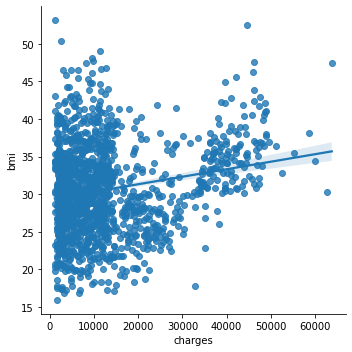

In [9]:
sns.lmplot(x="charges", y="bmi", data=data)

This boxplot shows that smokers in this dataset tended to have larger medical charges than those who do not smoke.

<AxesSubplot:xlabel='smoker', ylabel='charges'>

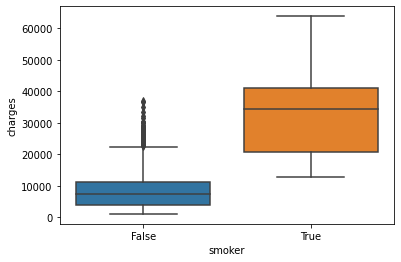

In [10]:
sns.boxplot(x="smoker", y="charges",data=data)

The boxplot below shows that there is only slight differences between the amount of children when looking at medical charges.

<AxesSubplot:xlabel='children', ylabel='charges'>

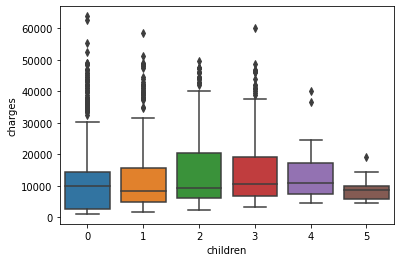

In [11]:
sns.boxplot(x="children", y="charges",data=data)

### Task 2 Analysis Pipeline

Load data

In [12]:
df = pd.read_csv("../data/raw/insurance.csv")

Clean data -
Drop all entries that contain a null value. Drop the "region" column. Change the string type in smoker to a bool type. Round the charges to 2 decimal places to better represent currency.

In [13]:
df = df.dropna(axis=0)
df = df.drop("region", axis=1)
df = df.assign(smoker=df["smoker"] == "yes")
df = df.assign(charges=round(df["charges"], 2))

Process Data

In [14]:
def getWeightStatus(row):
    if row["bmi"] < 18.5:
        return "Underweight"
    elif row["bmi"] >= 18.5 and row["bmi"] < 25.0:
        return "Healthy Weight"
    elif row["bmi"] >= 25.0 and row["bmi"] < 30.0:
        return "Overweight"
    elif row["bmi"] >= 30.0:
        return "Obesity"
    else:
        return "Unknown"


In [15]:

df = df.assign(weightStatus=df.apply(getWeightStatus, axis=1))
df = df.sort_values("charges")
df = df.reset_index()
df = df.drop("index", axis=1)
df

,age,sex,bmi,children,smoker,charges,weightStatus
0,18,male,23.210,0,False,1121.87,Healthy Weight
1,18,male,30.140,0,False,1131.51,Obesity
2,18,male,33.330,0,False,1135.94,Obesity
3,18,male,33.660,0,False,1136.40,Obesity
4,18,male,34.100,0,False,1137.01,Obesity
...,...,...,...,...,...,...,...
1333,33,female,35.530,0,True,55135.40,Obesity
1334,31,female,38.095,1,True,58571.07,Obesity
1335,52,male,34.485,3,True,60021.40,Obesity
1336,45,male,30.360,0,True,62592.87,Obesity


Wrangle Data- Changing order of columns

In [16]:
df = df[["charges", "bmi", "weightStatus", "smoker", "children", "age", "sex"]]

Saving dataframe as csv

In [17]:
df.to_csv("../data/processed/insurance_JOEL.csv", index=False)

### Task 3 Method Chaining

In [18]:
df1 = (pd.read_csv("../data/raw/insurance.csv")
    .dropna(axis=0)
    .drop("region", axis=1)
  )

df2 = (df1.assign(smoker=df1["smoker"] == "yes")
        .assign(charges=round(df1["charges"], 2))
        .assign(weightStatus=df1.apply(getWeightStatus, axis=1))
      )

df3 = (df2
        .sort_values("charges")
        .reset_index()
        .drop("index", axis=1)
      )

df4 = df3[["charges", "bmi", "weightStatus", "smoker", "children", "age", "sex"]]


In [19]:
def load_and_process(url):
    df1 = (pd.read_csv(url)
        .dropna(axis=0)
        .drop("region", axis=1)
      )
        
    df2 = (df1.assign(smoker=df1["smoker"] == "yes")
            .assign(charges=round(df1["charges"], 2))
            .assign(weightStatus=df1.apply(getWeightStatus, axis=1))
          )
    
    df3 = (df2
            .sort_values("charges")
            .reset_index()
            .drop("index", axis=1)
          )
    df4 = df3[["charges", "bmi", "weightStatus", "smoker", "children", "age", "sex"]]
    return df4

load_and_process("../data/raw/insurance.csv")

,charges,bmi,weightStatus,smoker,children,age,sex
0,1121.87,23.210,Healthy Weight,False,0,18,male
1,1131.51,30.140,Obesity,False,0,18,male
2,1135.94,33.330,Obesity,False,0,18,male
3,1136.40,33.660,Obesity,False,0,18,male
4,1137.01,34.100,Obesity,False,0,18,male
...,...,...,...,...,...,...,...
1333,55135.40,35.530,Obesity,True,0,33,female
1334,58571.07,38.095,Obesity,True,1,31,female
1335,60021.40,34.485,Obesity,True,3,52,male
1336,62592.87,30.360,Obesity,True,0,45,male


In [20]:
from project_functions2 import load_and_process

In [21]:
df = load_and_process("../data/raw/insurance.csv")

### Task 4 Analysis

The plots below shows an idea of the distribution of the data within the different columns. The table shows possible important values of each numerical column.
It looks like there are a greater amount of less expensive charges than more expensive. The bmi seems to be relatively normally distributed with a mean of 30.66. The weightStatus count plot suggests that most people fall under the obese status while a small amount fall under underweight. The smoker plot shows that there are more people who don't smoke. The children plot suggests that most people have 0 children, with each additional child bearing a lower count. The age histogram shows that the age is decently spread except there are a large amount of people around 20 years. The sex plot shows that there is no real difference in sex within this sample.

In [22]:
df.describe()

,charges,bmi,children,age
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,13270.422280,30.663397,1.094918,39.207025
std,12110.011259,6.098187,1.205493,14.049960
min,1121.870000,15.960000,0.000000,18.000000
25%,4740.287500,26.296250,0.000000,27.000000
50%,9382.030000,30.400000,1.000000,39.000000
75%,16639.915000,34.693750,2.000000,51.000000
max,63770.430000,53.130000,5.000000,64.000000


<AxesSubplot:xlabel='sex', ylabel='count'>

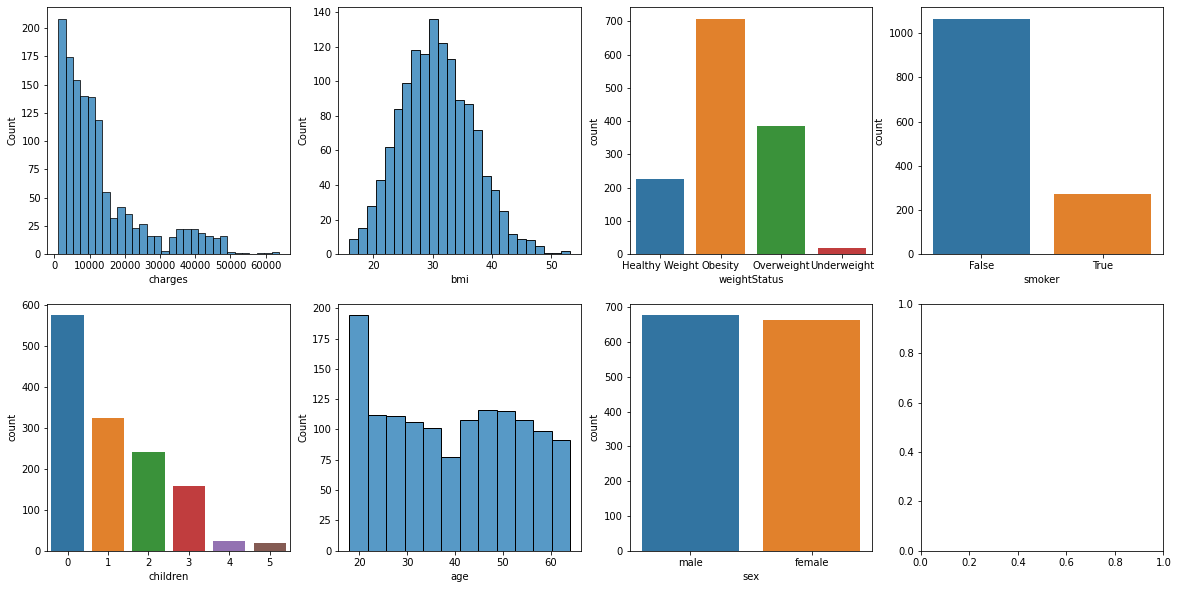

In [23]:
fig, ax = plt.subplots(2, 4, figsize=(20, 10))
sns.histplot(df["charges"], ax=ax[0][0])
sns.histplot(df["bmi"], ax=ax[0][1])
sns.countplot(x=df["weightStatus"], ax=ax[0][2])
sns.countplot(x=df["smoker"], ax=ax[0][3])
sns.countplot(x=df["children"], ax=ax[1][0])
sns.histplot(df["age"], ax=ax[1][1])
sns.countplot(x=df["sex"], ax=ax[1][2])

#### Let's first take a look at how age effects medical charges and bmi.

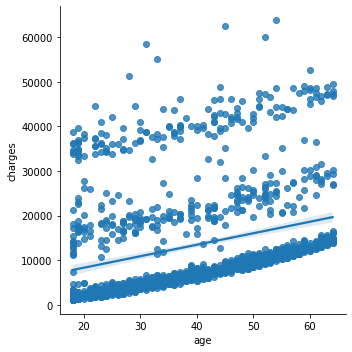

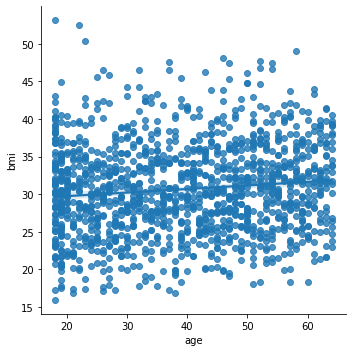

In [24]:
sns.lmplot(x="age", y="charges", data=df)
sns.lmplot(x="age", y="bmi", data=df)

The above age vs charges plot seems to be quite odd. There seems to be quite a few points which fall further upwards of the average. There is however a dense section of points which trends upwards with age. This suggests that with age medical expenses do increase.

The age vs bmi plot really doesn't show much. The attempt of the line of best fit almost has zero slope. The points are seemingly random. So this can mean that there really isn't any correlation between age and bmi according to this dataset.

#### Now lets look at how weight status impacts medical charges.

<AxesSubplot:xlabel='weightStatus', ylabel='charges'>

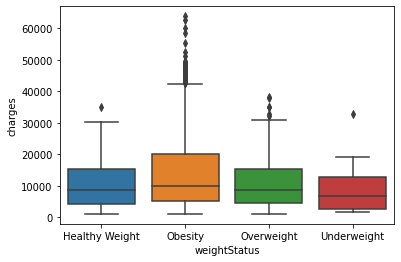

In [25]:
sns.boxplot(x="weightStatus",y="charges",data=df)

This shows that the mean is relatively equal across the different statuses. There are a much higher amount of obese people with larger deviations from the mean in the positive direction. The upper quartile is a lot higher for obesity when comparing to the others. Underweight's mean shows that it is actually quite close to its lower quartile.

#### Next lets see how smoking effects bmi and charges.

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

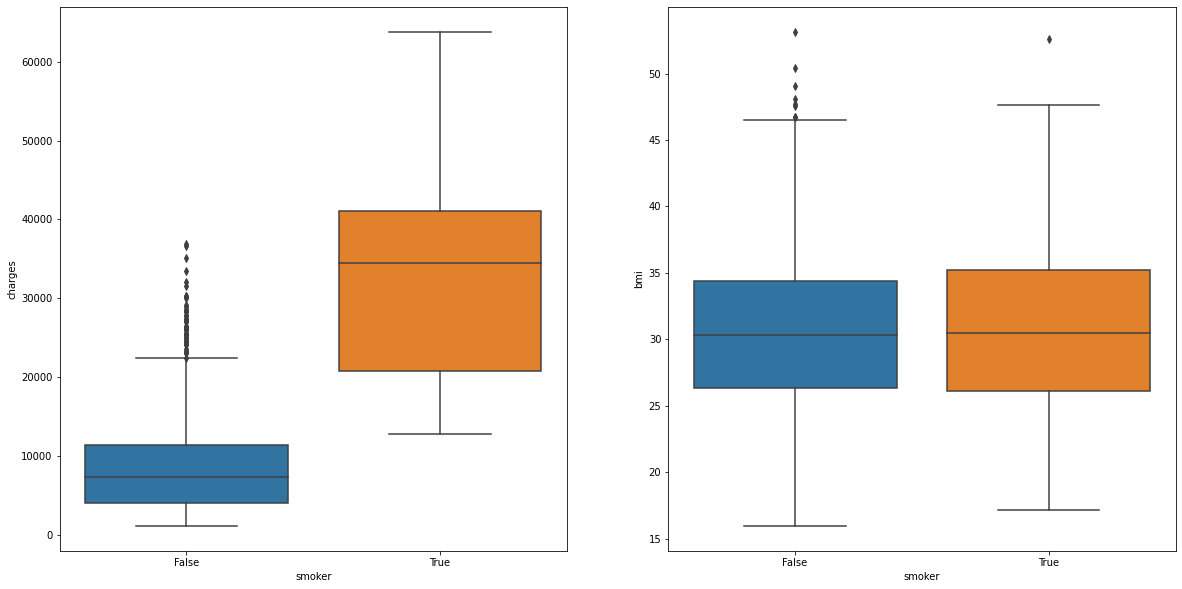

In [26]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20, 10))
sns.boxplot(x="smoker",y="charges",data=df,ax=ax1[0])
sns.boxplot(x="smoker",y="bmi",data=df,ax=ax1[1])

The above boxplots show that there is a large difference in medical charges. Being a smoker suggests that medical expenses will be much higher. While bmi doesn't seem to change across smoker and non smokers. 

#### Let's look at how the number of children effects medical charges and bmi.

<AxesSubplot:xlabel='children', ylabel='bmi'>

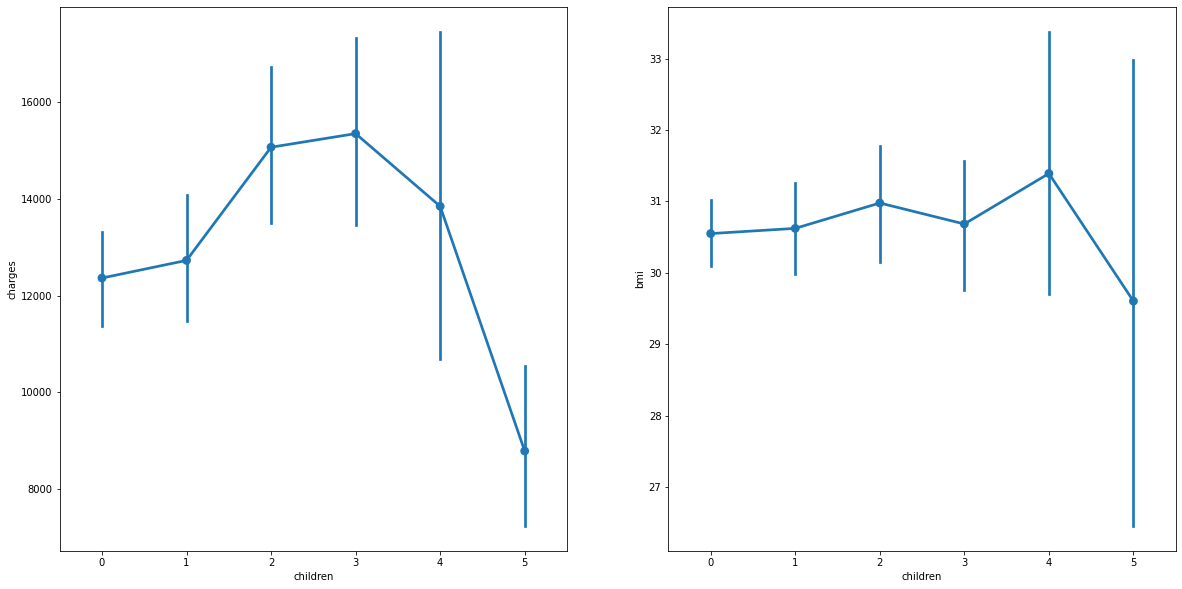

In [27]:
fig2, ax2 = plt.subplots(1, 2, figsize=(20, 10))
sns.pointplot(x="children",y="charges",data=df,ax=ax2[0])
sns.pointplot(x="children",y="bmi",data=df,ax=ax2[1])

The above point plots show that there is a noticable increase in charges for the 2nd and 3rd child, but drops off drastically for the 5th child. The effect on bmi seems decently consistant across the number of children. By the 5th child however the average drops, and the deviation increases massively. This may be because there aren't many people with 5 children in this dataset.

#### Now lets see if sex has any correlation with charges and/or bmi

<AxesSubplot:xlabel='sex', ylabel='bmi'>

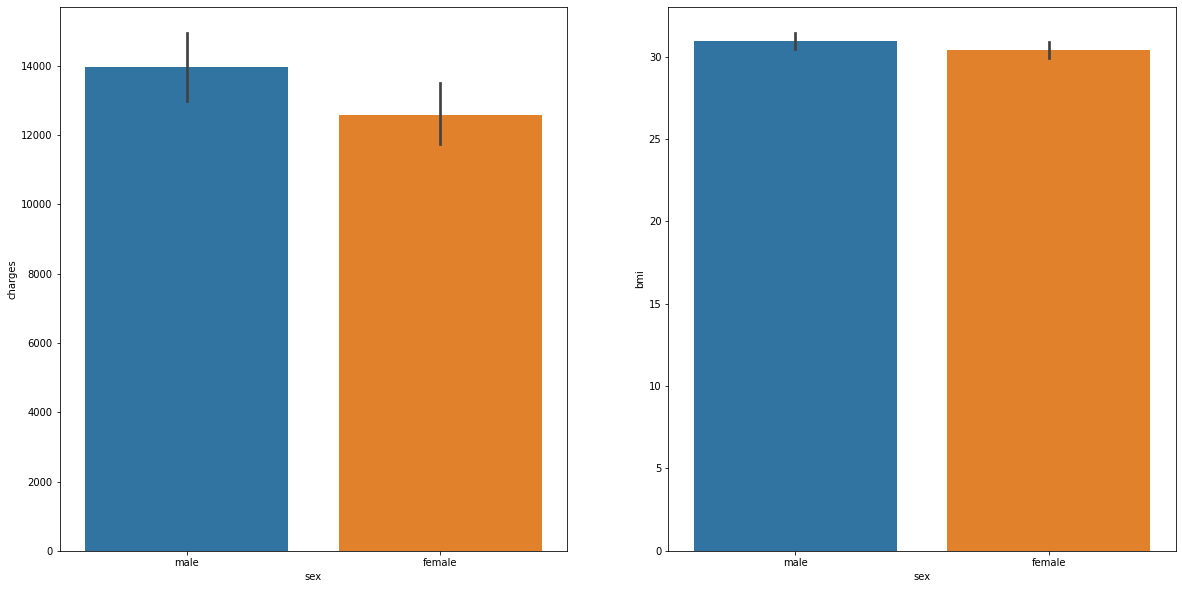

In [28]:
fig3, ax3 = plt.subplots(1, 2, figsize=(20, 10))
sns.barplot(x="sex",y="charges",data=df,ax=ax3[0])
sns.barplot(x="sex",y="bmi",data=df,ax=ax3[1])

The above bar plots show that there are small differences in sex when looking at charges and bmi. The charges show that male average charges are slightly greater than female. The bmi difference is very small here.